### IS727272 - Cordero Hernández, Marco Ricardo

# Exercise 4.3.8 Document Classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = None

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loding the data

The data is composed of 4436 documents that are classified in two different classes '0' and '1'. Class 0 has 2840 entries and class 1 has 1596.

first column is the class and second column is the text of the document.

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Document classification/train-1.csv', header=None)
print('size of class 0:', sum(data[0] == 0))
print('size of class 1:', sum(data[0] == 1))

# Show the 12th entry
print(data[1].iloc[12]);


size of class 0: 2840
size of class 1: 1596
standard trustco sees better year standard trustco said it expects earnings in to increase at least to pct from the dlrs or dlrs per share recorded in stable interest rates and a growing economy are expected to provide favorable conditions for further growth in president brian o malley told shareholders at the annual meeting standard trustco previously reported assets of billion dlrs in up from billion dlrs in return on common shareholders equity was pct last year up from pct in reuter 


## Preprocessing the data

We need to find a way to represent individual observations of texts as a row, and encode a static number of features, represented as columns, across all of these observations. As such, feature extraction becomes the most important aspect of text preprocessing.

If you have a look at the data, you will realize that the data is kind of clean. We still want to get rid of stop words, which are usually defined as very common words in a given language.

Although you can find ways to implement this from scratch, I suggest you utilize the Natural Language Toolkit (NLTK) module.

In [6]:
import nltk
from nltk.corpus import stopwords # we need nltk corpus to be installed
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')  # uncomment this if nltk is not installed

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In next cell we are to remove all stop words found in each document in data. We need also to split the whole text into words. 

``
Example:
Original text:    "expects earnings in to increase at least to told"
After processing: 'expects', 'earnings', 'increase', 'least', 'told'
``

<span style="color:red">**Note:**</span> Make sure you remove the empty string (' ') at the end of the text.

In [7]:
from nltk.corpus.reader.ycoe import wordpunct_tokenize
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

for i in range(len(data)):
  words = word_tokenize(data[1].iloc[i])
  words_filtered = []

  for w in words:
    if w not in stopWords:
      words_filtered.append(w)
  data[1].iloc[i] = words_filtered

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


__Word tokenization__: It is simply the process of separating a single string object, usually a body of text of varying length, into individual tokens that represent words that we would like to evaluate further.

## Checkpoint: tokens

Now the text is seen as tokens:

In [8]:
print(data[1].iloc[12]);

['standard', 'trustco', 'sees', 'better', 'year', 'standard', 'trustco', 'said', 'expects', 'earnings', 'increase', 'least', 'pct', 'dlrs', 'dlrs', 'per', 'share', 'recorded', 'stable', 'interest', 'rates', 'growing', 'economy', 'expected', 'provide', 'favorable', 'conditions', 'growth', 'president', 'brian', 'malley', 'told', 'shareholders', 'annual', 'meeting', 'standard', 'trustco', 'previously', 'reported', 'assets', 'billion', 'dlrs', 'billion', 'dlrs', 'return', 'common', 'shareholders', 'equity', 'pct', 'last', 'year', 'pct', 'reuter']


<span style="color:green">**Expected output:**</span>

``
['standard', 'trustco', 'sees', 'better', 'year', 'standard', 'trustco', 'said', 'expects', 'earnings', 'increase', 'least', 'pct', 'dlrs', 'dlrs', 'per', 'share', 'recorded', 'stable', 'interest', 'rates', 'growing', 'economy', 'expected', 'provide', 'favorable', 'conditions', 'growth', 'president', 'brian', 'malley', 'told', 'shareholders', 'annual', 'meeting', 'standard', 'trustco', 'previously', 'reported', 'assets', 'billion', 'dlrs', 'billion', 'dlrs', 'return', 'common', 'shareholders', 'equity', 'pct', 'last', 'year', 'pct', 'reuter']
``

### Creating a dictionary of words

Now we are going to find the words in all the documents and count the number of times a word is found.

In [9]:
Words = {}
tmp = data.copy()
tmp2 = []
for i in range(len(tmp)):
  tmp2 += tmp[1].iloc[i]

print(len(tmp2))

271005


In [10]:
# Count the frequency of the different words in the list tmp2
fdist = FreqDist(tmp2)
print(fdist)

<FreqDist with 15786 samples and 271005 outcomes>


In [11]:
words = fdist.most_common(len(tmp2))
print(len(words), 'total of different words')


15786 total of different words


<span style="color:green">**Expected output:**</span>

``
15787 total of different words
``

### Sorting the words

Now, you need to sort the words and get the **N** most influential words. The influential words are the ones that are seen more frecuently in all the documents.

In [12]:
def takeSecond(elem):
  return elem[1]

sorted_words = sorted(words, reverse = True, key = takeSecond)
print(sorted_words[:5])

[('vs', 9158), ('mln', 9034), ('said', 7449), ('dlrs', 5929), ('cts', 5510)]


<span style="color:green">**Expected output:**</span>

``
Influential words 1000
[('vs', 9158), ('mln', 9034), ('said', 7449), ('dlrs', 5929), ('cts', 5510)]
['vs', 'mln', 'said', 'dlrs', 'cts', 'net', 'reuter', 'loss', 'year', 'company']
``

In [13]:
# Choosing only the 1000 most frequent words
influential1 = sorted_words[:1000]
influential = [i for i, j in influential1]

print(influential[:10])

['vs', 'mln', 'said', 'dlrs', 'cts', 'net', 'reuter', 'loss', 'year', 'company']


## Creating the features
Now, you need to count the number of times each word in influential appears in every document. So, you will add a column for each word in influential list into the data.

In [14]:
# Add a column for each influential word and compute the number it appears for each document
data1 = data.copy()

for i in range(len(influential)):
  word1 = influential[i]
  conteo = []
  for j in range(len(data1)):
    lista = data1[1].iloc[j]
    conteo.append(int(lista.count(word1)))
  data1[word1] = pd.Series(conteo)
print(data1.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.


   0                                                  1  vs  mln  said  dlrs  \
0  0  [champion, products, ch, approves, stock, spli...   0    2     2     0   
1  1  [computer, terminal, systems, cpml, completes,...   0    1     7     4   
2  0  [cobanco, inc, cbco, year, net, shr, cts, vs, ...   5    6     0     2   
3  0  [international, inc, nd, qtr, jan, oper, shr, ...   9    8     0     0   
4  0  [brown, forman, inc, bfd, th, qtr, net, shr, o...   6    7     0     2   

   cts  net  reuter  loss  ...  cent  components  fair  community  meet  \
0    0    0       1     0  ...     0           0     0          0     0   
1    0    0       1     0  ...     0           0     0          0     0   
2    2    2       1     0  ...     0           0     0          0     0   
3    7    1       1     2  ...     0           0     0          0     0   
4    1    3       1     0  ...     0           0     0          0     0   

   david  parties  cos  chain  branch  
0      0        0    0      

<span style="color:green">**Expected output:**</span>  Just the first row:

``
___0                                                  1  vs  mln  said  dlrs
0  0  [champion, products, ch, approves, stock, spli...   0    2     2     0   
1  1  [computer, terminal, systems, cpml, completes,...   0    1     7     4   
2  0  [cobanco, inc, cbco, year, net, shr, cts, vs, ...   5    6     0     2   
3  0  [international, inc, nd, qtr, jan, oper, shr, ...   9    8     0     0   
4  0  [brown, forman, inc, bfd, th, qtr, net, shr, o...   6    7     0     2
:
.
[5 rows x 1002 columns]
``

## Get numpy matrix

Let's shuffle the data, add a column of 1's called '`const`' and split the data to have train and test dataset.

In [15]:
np.random.seed(1)
data = data1.sample(frac=1).reset_index(drop=True)
data.head()

,0,1,vs,mln,said,dlrs,cts,net,reuter,loss,...,cent,components,fair,community,meet,david,parties,cos,chain,branch
0,0,"[perry, drug, stores, inc, pds, st, qtr, jan, ...",3,2,0,0,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,"[wall, street, stocks, anacomp, inc, aac, anac...",0,7,6,9,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,"[bristol, myers, co, bmy, sets, quarterly, qtl...",1,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"[l, acquisition, raises, u, toll, federal, hom...",0,2,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,"[gulf, states, utilities, gsu, gets, qualified...",0,0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Use the function `train_test_split` to split the data, use 80% for training and 20% for testing.

recall that features for our X are **`'const' + influential`**, target data **`y`** is the column `0`.

In [16]:
from sklearn.model_selection import train_test_split

data1['const'] = 1
X_train, X_test, y_train, y_test = train_test_split(data1[ ['const'] + influential], data1[0], test_size=0.2)
print('Training data: ', X_train.shape, y_train.shape)
print('Testing data: ', X_test.shape, y_test.shape)

Training data:  (3548, 1001) (3548,)
Testing data:  (888, 1001) (888,)


In [17]:
#Get numpy data from DataFrame
X = np.array(X_train)
y = np.array(y_train).reshape(-1,1)
X_t = np.array(X_test)
y_t = np.array(y_test).reshape(-1,1)
print('X', X.shape, 'y', y.shape)

X (3548, 1001) y (3548, 1)


<span style="color:green">**Expected output:**</span>

``
X (3548, 1001) y (3548, 1)
``

## Gradient descent

Implement next functions to finally implement your gradient descent, you already know this functions.

In [18]:
# compute logistic function
def h(x, w):
    return (1 / (1 + np.exp(-np.dot(w, x.T)))).T   

# Compute the cost
def cost(x, y, w):
    m, n = np.shape(y)
    c = -(1/m) * np.sum(y * np.log(h(x, w)) + (1 - y) * np.log(1 - h(x, w)))
    print("costo =", c.shape)
    return c

# Compute the gradient for all w's, do not use regularization
def grad(x, y, w):
    m, n = np.shape(x)
    g = (1 / m) * np.dot(x.T, (h(x, w) - y))
    return g
    
# gradient descent
def gd(x, y, w, alpha = 0.001, its = 1000):
    J = {}
    costo = 0

    for i in range(its):
        # Gradient
        gradiente = grad(x, y, w)
            
        #Cost function
        costo = cost(x, y, w)
      
        #Updating w
        w = w - alpha * gradiente.T
                
        #Storing cost
        J[i] = costo    
    return w, J

## Checkpoint: Test your code

In [19]:
import time

**Note:** It will take **9.5 hours** to train... just kidding!

costo = ()
cost from train: 0.6931471805599454
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Streaming output truncated to the last 5000 lines.
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
costo = ()
cos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


TypeError: ignored

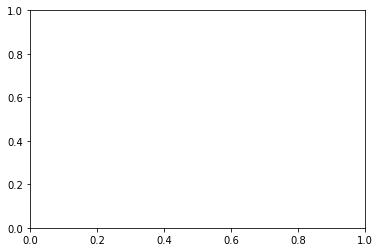

In [19]:
m, n = X.shape
alpha = 0.01
its = 8000 #once it is working you can test increasing the number of iterations
w = np.zeros((1, n))
print('cost from train:', cost(X, y, w))
time_start = time.clock()
w, J = gd(X, y, w, alpha, its)
time_elapsed = (time.clock() - time_start)
print('cost from train after training:', cost(X, y, w))
print('GD took', time_elapsed/60, 'minutes for', its, 'iterations')
w = w.reshape(-1)
print(w)

#Plot the cost over the iterations
plt.plot(J.keys(), J.values())
plt.xlabel('Iterations')
plt.ylabel('Cost');

<span style="color:green">**Expected output:**</span>

``
cost from train: 0.69314718056
cost from train after training: 0.0609401997241
GD took 9.595006166666668 minutes for 8000 iterations            <<< Do not expect it to be same
[ 0.45577217 -0.99538671 -0.24285189 ..., -0.03876273  0.02442601
 -0.03338738]
``

## Accuracy

Fraction of correctly classified samples.

In [20]:
#This function returns fraction and correctly classified
#fraction  = (true positives + true negatives) / total_samples
def accuracy(x, y, w):
    h1 = h(x, w)
    Ynew = []
    
    for i in range(len(h1)):
        if h1[i] > 0.5:
            Ynew.append(1)
        else:
            Ynew.append(0)
    
    Ynew = np.array(Ynew)
    Ynew = Ynew.reshape(-1, 1)
    
    tptn = (y == Ynew).sum()
    acc = tptn/len(y)
    return acc, tptn

In [21]:
m = len(y)
score, tptn = accuracy(X, y, w)
print('Accuracy in train =', score)
print(tptn, 'out of', m)

UFuncTypeError: ignored

<span style="color:green">**Expected output:**</span>

``
Accuracy in train = 0.98900789177
3509 out of 3548
``

### Compute accuracy and cost in test data

In [22]:
yt = np.array(y_test).reshape(-1,1)
m = len(yt)
Xt = np.array(X_test)
score, tptn = accuracy(Xt, yt, w)
print('Accuracy in train =', score)
print(tptn, 'out of', m)

UFuncTypeError: ignored

<span style="color:green">**Expected output:**</span>

``
Accuracy in train = 0.986486486486
876 out of 888
``

## Sensitivity and specificity

To compute sensitivity and specificity we need to extract four summary values from our classification results. These are the numbers of:

1. True positives (TP) – the number of objects with class = 1 that are classified as 1
2. True negatives (TN) – the number of objects with class = 0 that are classified as 0
- False positives (FP) – the number of objects with class = 0 that are classified as 1
- False negatives (FN) – the number of objects with class = 1 that are classified as 0

we compute sensitivity (recall) as: $s_e = \frac{TP}{TP + FN}$

and specificity as: $s_p = \frac{TN}{TN + FP}$

Both values lie between 0 and 1.

consider using for computing `values` function:

```python
sum(y_true & pred_true)
```

In [23]:
# p is the probability
# threshold, class is 1 if probability >= threshold
def predict(p, threshold):
    y_hat = list(map(lambda x: 1 if x >= threshold else 0, p))
    return y_hat

# to compute sensitivity and specificity we need to extract the four values
# returns a dictionary V={'TP':val, 'TN':val,'FN': val, 'FP':val}
def values(y, pred):
    tn = tp = fp = fn = 0
    for i in range(len(y)):
        if y[i] == pred[i]:
            if y[i] == 0:
                tn += 1
            else:
                tp += 1
        else:
            if y[i] == 0:
                fp += 1
            else:
                fn += 1
        
    V = {'TP':tp, 'TN':tn, 'FN':fn, 'FP':fp}
    return V

def sensitivity(V):
    sen = V['TP'] / (V['TP'] + V['FN'])
    return sen

def specificity(V):
    spec = V['TN'] / (V['TN'] + V['FP'])
    return spec

## Checkpoint: Test tour code

In [24]:
y_values = np.array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0])
p = np.array([0.2, .9, .8, 0.49, .5, .48, .02, .99, .8, .52])
thr = 0.5
print('y    ', y_values)
pred = predict(p, thr)
print('pred ', pred)
V = values(y_values, pred)
print(V)

print('Sensitivity: ', sensitivity(V))
print('Specificity: ', specificity(V))

y     [0 1 1 1 0 1 0 1 1 0]
pred  [0, 1, 1, 0, 1, 0, 0, 1, 1, 1]
{'TP': 4, 'TN': 2, 'FN': 2, 'FP': 2}
Sensitivity:  0.6666666666666666
Specificity:  0.5


<span style="color:green">**Expected output:**</span>

``
y     [0 1 1 1 0 1 0 1 1 0]
pred  [0 1 1 0 1 0 0 1 1 1]
{'TP': 4, 'TN': 2, 'FN': 2, 'FP': 2}
Sensitivity:  0.666666666667
Specificity:  0.5
``

### ROC curve

The receiver operating characteristic (ROC) curve lets us examine how the performance varies as we change this threshold.

In [25]:
# compute sensitivity and specificity for each threshold in [0, 1]
# return Se, Sp
def ROC(y, p):
    thrs = np.arange(0, 1, 0.05)
    Se = np.zeros((len(thrs)))
    Sp = np.zeros((len(thrs)))
    for j in range(len(thrs)):
        pred = predict(p,thrs[j])
        V = values(y, pred)
        Se[j] = sensitivity(V)
        Sp[j] = specificity(V)
    return Se, Sp

### Test Roc function

In [26]:
pred = predict(h(X, w), 0.5)
print('Four values for training:', values(y.squeeze(), pred))

Se, Sp = ROC(y, h(X, w))
plt.plot(1 - Sp, Se, '-');

pred1 = predict(h(X_t, w), 0.5)
print('Four values for testing:', values(y_t.squeeze(), pred1))

Se1, Sp1 = ROC(y_t, h(X_t, w))
plt.plot(1 - Sp1, Se1, '-');

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity');
plt.legend(['Train', 'Test'])
plt.title('Receiver Operating Characteristic');

UFuncTypeError: ignored

<span style="color:green">**Expected output:**</span>

``
Four values for training: {'TP': 1237, 'TN': 2272, 'FN': 11, 'FP': 28}
Four values for testing: {'TP': 345, 'TN': 531, 'FN': 3, 'FP': 9}
``

## Area Under the ROC curve

The curve will always start at $S_e = 0, 1 − S_p = 0$, corresponding to a threshold that never classifies anything as belonging to class 1, and finish at $S_e = 1, 1 − S_p = 1$, corresponding to a classifier that never classifies anything as belonging to class 0.

As the classifier gets worse, the curve will get closer to a straight line from (0, 0) to (1, 1).

We can now quantify the **performance** by computing the area under the ROC curve known as the __AUC__. A classifier that is able to perfectly classify the data will have an AUC of **1**, a classifier that is guessing randomly will have an AUC of **0.5**.

In [27]:
from sklearn import metrics #use this library to compute AUC

In [28]:
print('Train AUC: ', metrics.roc_auc_score(y, h(X, w)));
print('Test AUC: ', metrics.roc_auc_score(y_test, h(X_test, w)));

UFuncTypeError: ignored

<span style="color:green">**Expected output:**</span>

``
Train AUC:  0.998605072464
Test AUC:  0.995934440187
``